# 00 | EDA - Configuración General

1. Carga de librerías.

2. Seteo de estilos del notebook.

3. Ingesta del dataset.

In [1]:
import sys
import os
import statistics

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



sys.path.append(os.path.abspath(os.path.join('..', 'src', 'utils')))
import utils as ut

In [2]:
# Seteo de estilos
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
wines = pd.read_csv("../src/data/transformed/wines_transformed.csv")
pd.set_option('display.max_columns', None)
wines.head(10)

,wine_link,name,year,winery,rating,rating_qty,price,body,tannis,sweetness,acidity,style,alcohol,image,ageing,black fruit,citrus,dried fruit,earthy,floral,oaky,red fruit,spices,tree fruit,tropical,vegetal,yeasty,any junk food will do,aperitif,appetizers and snacks,beef,blue cheese,cured meat,"game (deer, venison)",goat's milk cheese,lamb,lean fish,mature and hard cheese,mild and soft cheese,mushrooms,pasta,pork,poultry,"rich fish (salmon, tuna etc)",shellfish,spicy food,veal,vegetarian,Albariño,Barbera,Bonarda,Béquignol Noir,Cabernet Franc,Cabernet Sauvignon,Cereza,Chardonnay,Chenin Blanc,Criolla Grande,Garnacha,Gewürztraminer,Grenache,Grüner Veltliner,Malbec,Malvasia,Marsanne,Mencia,Merlot,Moscatel,Mourvedre,Pais,Pedro Giménez,Pedro Ximenez,Petit Verdot,Pinot Gris,Pinot Noir,Riesling,Roussanne,Sangiovese,Sauvignon Blanc,Shiraz/Syrah,Sémillon,Tannat,Tempranillo,Torrontés,Trousseau,Verdejo,Viognier,Agrelo,Argentina,Brazil,Cafayate Valley,Calchaqui Valley,Campanha,Famatina,Gualtallary,La Consulta,La Rioja,Las Compuertas,Lujan de Cuyo,Lunlunta,Maipu,Mendoza,Paraje Altamira,Patagonia,Pedernal Valley,Perdriel,Rio Grande do Sul,Rio Negro,Salta,San Carlos,San Juan,San Rafael,Serra Gaúcha,Tulum Valley,Tunuyán,Tupungato,Uco Valley,Vale dos Vinhedos,Vista Flores
0,https://www.vivino.com/US/en/luigi-bosca-parai...,Paraiso,2020.0,Luigi Bosca,4.8,582.0,188.33,0.7343,0.5090,0.1361,0.4474,Argentinian Cabernet Sauvignon - Malbec,NaN,https://images.vivino.com/thumbs/_Bf6JTwYRpSX6...,0.0000,0.3500,0.0000,0.0000,0.1250,0.0500,0.3250,0.0500,0.1000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2015.0,Catena Zapata,4.7,297.0,675.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.140,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.0080,0.0120,0.0964,0.0241,0.4378,0.0843,0.1004,0.0000,0.0,0.0040,0.0080,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2017.0,Catena Zapata,4.7,219.0,580.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,NaN,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.0080,0.0120,0.0964,0.0241,0.4378,0.0843,0.1004,0.0000,0.0,0.0040,0.0080,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,https://www.vivino.com/US/en/monteviejo-la-vio...,La Violeta,2013.0,Monteviejo,4.7,202.0,150.00,0.7306,0.4091,0.2148,0.3661,Argentinian Uco Valley Malbec Red,0.145,https://images.vivino.com/thumbs/FO-x9h3mQHSx9...,0.0061,0.2988,0.0000,0.0061,0.1585,0.0671,0.3110,0.0671,0.0671,0.0000,0.0,0.0061,0.0122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,https://www.vivino.com/US/en/vina-cobos-cobos-...,Cobos Volturno,2018.0,Viña Cobos,4.7,198.0,399.99,0.7105,0.4563,0.2426,0.3844,Argentinian Cabernet Sauvignon - Malbec,NaN,https://images.vivino.com/thumbs/D1Mf1fYnRnage...,0.0258,0.2526,0.0103,0.0103,0.0773,0.0103,0.4433,0.0773,0.0876,0.000

# 01 | Distribución de Datos Numéricos
- Esta sección se enfoca en analizar la distribución de variables numéricas para comprender valores habituales y atípicos, densidad de valores y estadísticas descriptivas generales.

## Rating
- ¿Cuales son los ratings más comunes?
- ¿El rating se relaciona con la cantidad de ratings?
- ¿El rating es un buen parámetro para la recomendación de vinos?
- ¿La cantidad de ratings se relaciona con un buen rating?
<br>
<br>
---

In [4]:
wines[["rating", "rating_qty"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,2026.0,4.012192,0.280431,2.9,3.90,4.0,4.2,4.8
rating_qty,1606.0,735.927148,1276.337340,25.0,107.25,277.0,769.0,18091.0


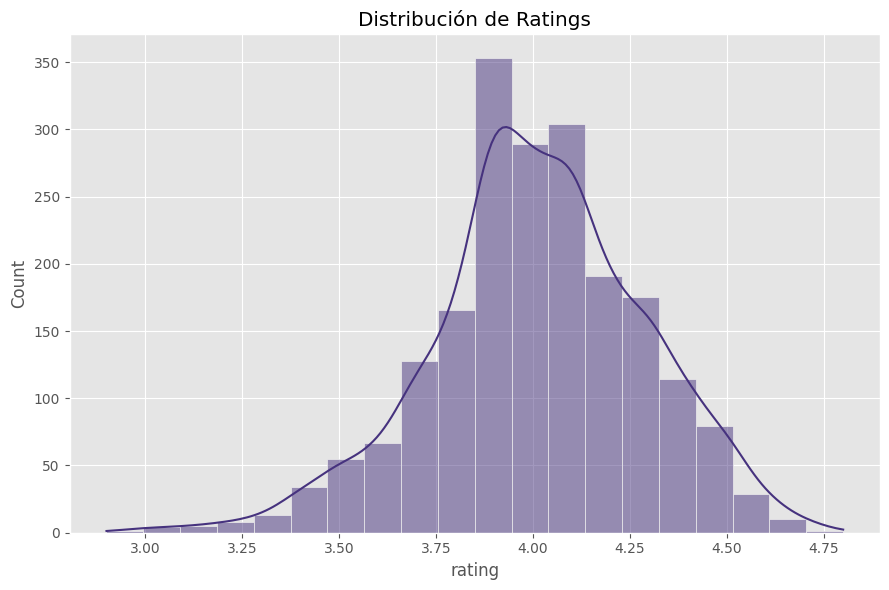

In [5]:
sns.histplot(wines['rating'], bins=20, kde=True)
plt.title('Distribución de Ratings')

plt.tight_layout()
plt.show()

<Axes: xlabel='rating', ylabel='Count'>

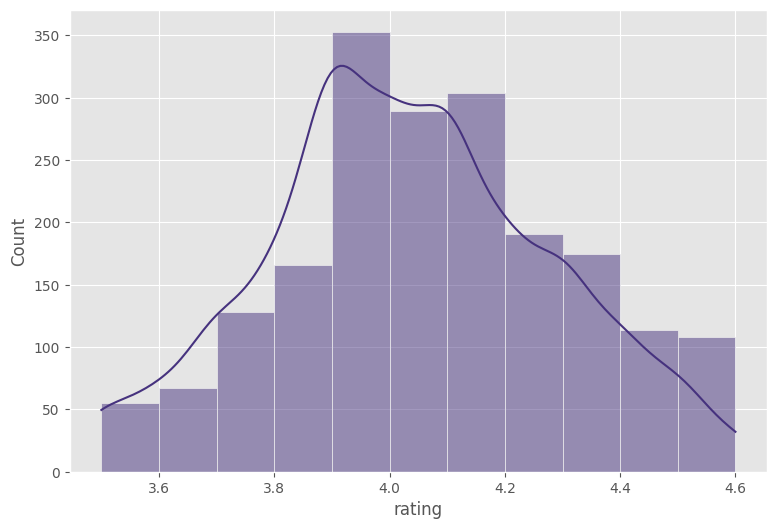

In [6]:
no_outlier_rating = ut.manage_outlier_IQR(df=wines["rating"], func="remove")
sns.histplot(no_outlier_rating, binwidth=0.1, kde=True)

<Axes: xlabel='rating_qty', ylabel='Count'>

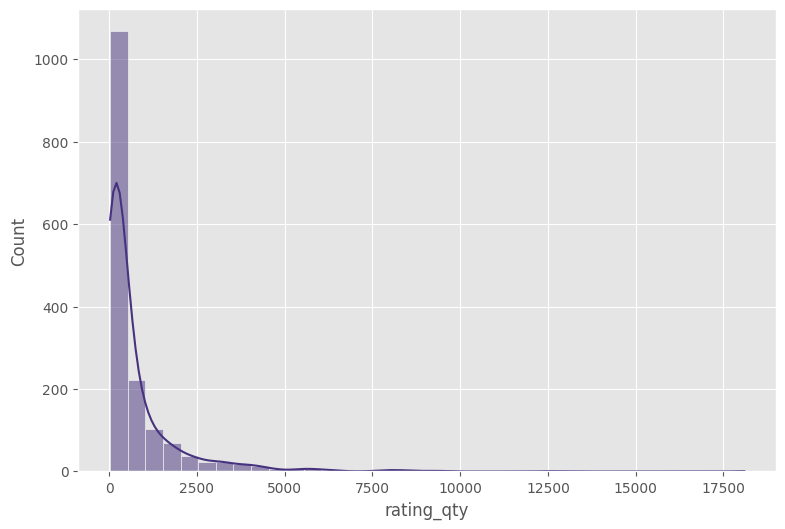

In [7]:
sns.histplot(wines, x="rating_qty", binwidth=500, kde=True)

<Axes: xlabel='rating_qty', ylabel='Count'>

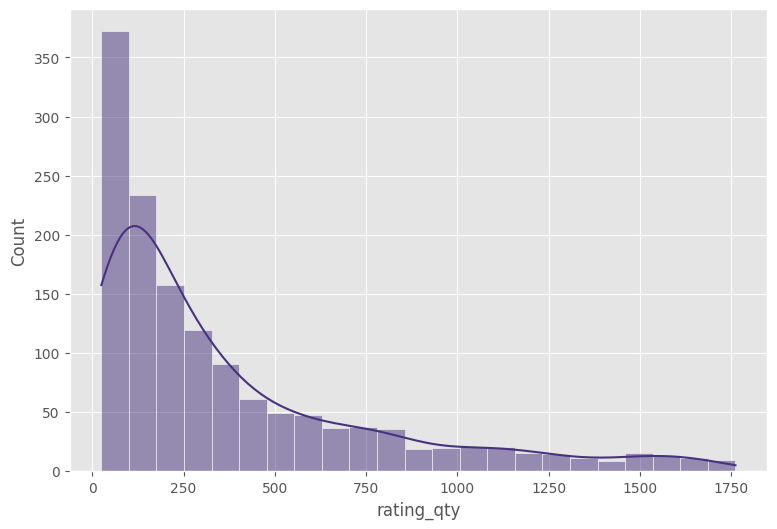

In [8]:
no_outlier_rating_qty = ut.manage_outlier_IQR(df=wines["rating_qty"], func="remove")
sns.histplot(no_outlier_rating_qty, kde=True)

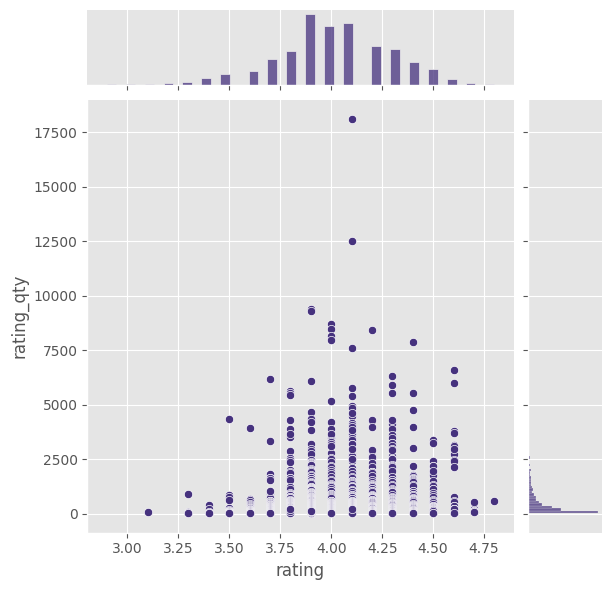

In [9]:
sns.jointplot(data=wines, x="rating", y="rating_qty")

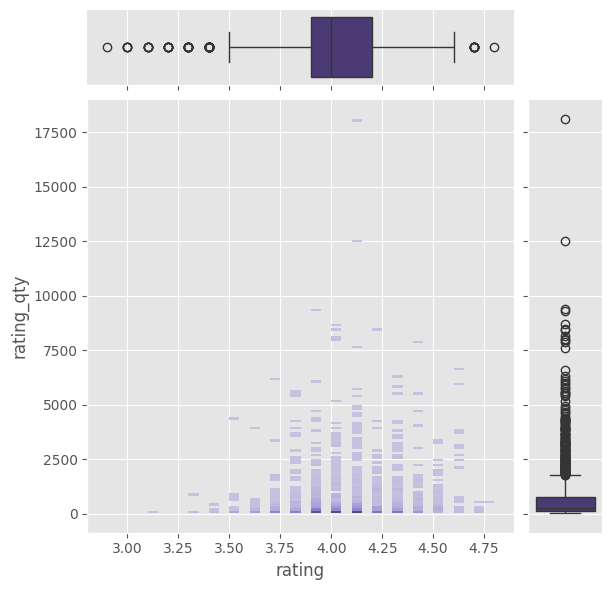

In [10]:
g = sns.JointGrid(data=wines, x="rating", y="rating_qty")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

## Price

- ¿Qué sería un vino caro y uno barato?
- ¿Nuestro dataset contiene muchos vinos caros o más baratos?
- ¿Los vinos más caros son mejores que los baratos?
- ¿Los existe algún equilibrio entre precio/calidad óptimo?
<br>
<br>
---

In [11]:
pd.DataFrame(wines["price"]).describe().T

,count,mean,std,min,25%,50%,75%,max
price,2009.0,44.952374,62.63628,6.55,19.17,25.0,44.04,1438.99


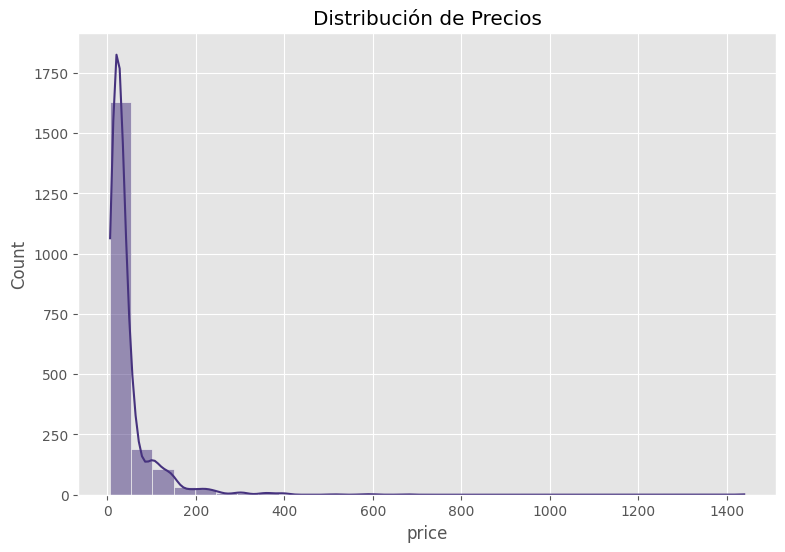

In [12]:
sns.histplot(wines['price'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

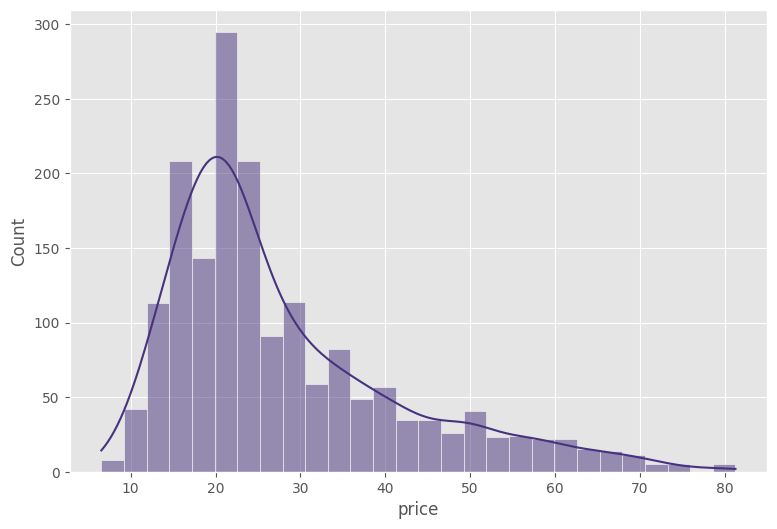

In [13]:
no_outlier_price = ut.manage_outlier_IQR(df=wines["price"], func="remove")
sns.histplot(no_outlier_price, kde=True)

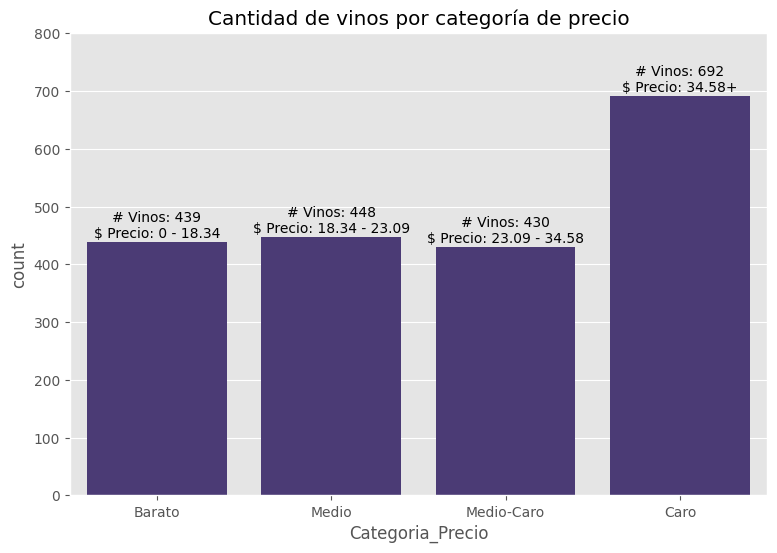

In [14]:
cheap_threshold = no_outlier_price.quantile(0.25)
mid_threshold = no_outlier_price.quantile(0.5)
expensive_threshold = no_outlier_price.quantile(0.75)

def categorizar_precio(p, cheap, mid, exp):
    if p <= cheap_threshold:
        return "Barato"
    elif ((p > cheap) & (p <= mid)):
        return "Medio"
    elif ((p > mid) & (p <= exp)):
        return "Medio-Caro"
    elif p > exp:
        return "Caro"
    else:
        return "Desconocido"

wines['Categoria_Precio'] = wines['price'].apply(
    lambda p: categorizar_precio(p, cheap_threshold, mid_threshold, expensive_threshold)
)

categorias_precio = ['Barato', 'Medio', 'Medio-Caro', 'Caro']

categories_map = {
    "Barato": f"0 - {round(cheap_threshold,2)}",
    "Medio": f"{round(cheap_threshold,2)} - {round(mid_threshold,2)}",
    "Medio-Caro": f"{round(mid_threshold,2)} - {round(expensive_threshold,2)}",
    "Caro": f"{round(expensive_threshold,2)}+"
}

ax = sns.countplot(
    data=wines,
    x='Categoria_Precio',
    order=categorias_precio,
)

ax.set_ylim(0, 800)

for p, categoria in zip(ax.patches, categorias_precio):
    height = p.get_height()
    price_range = categories_map[categoria]

    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 2, 
        f'# Vinos: {int(height)}\n$ Precio: {price_range}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Cantidad de vinos por categoría de precio")
plt.show()

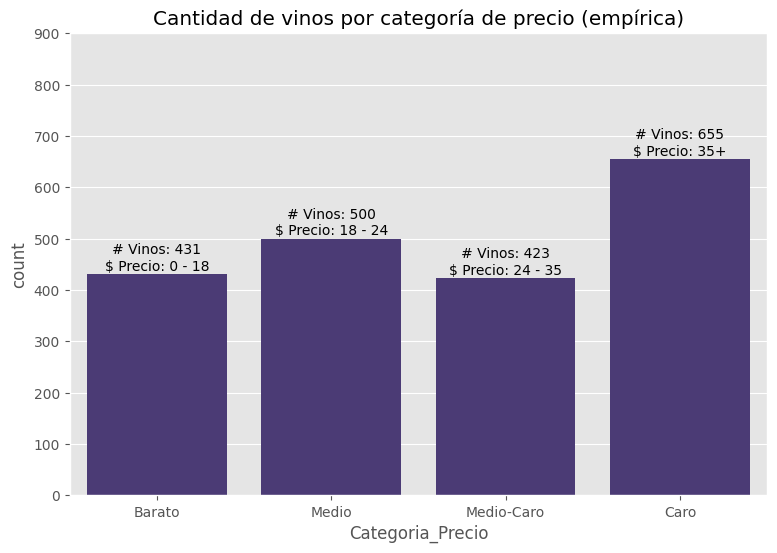

In [15]:
cheap_threshold = 18
mid_threshold = 24
expensive_threshold = 35

wines['Categoria_Precio'] = wines['price'].apply(
    lambda p: categorizar_precio(p, cheap_threshold, mid_threshold, expensive_threshold)
)

categorias_precio = ['Barato', 'Medio', 'Medio-Caro', 'Caro']

categories_map = {
    "Barato": f"0 - {round(cheap_threshold,2)}",
    "Medio": f"{round(cheap_threshold,2)} - {round(mid_threshold,2)}",
    "Medio-Caro": f"{round(mid_threshold,2)} - {round(expensive_threshold,2)}",
    "Caro": f"{round(expensive_threshold,2)}+"
}

ax = sns.countplot(
    data=wines,
    x='Categoria_Precio',
    order=categorias_precio,
)

ax.set_ylim(0, 900)

for p, categoria in zip(ax.patches, categorias_precio):
    height = p.get_height()
    price_range = categories_map[categoria]

    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 2, 
        f'# Vinos: {int(height)}\n$ Precio: {price_range}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Cantidad de vinos por categoría de precio (empírica)")
plt.show()

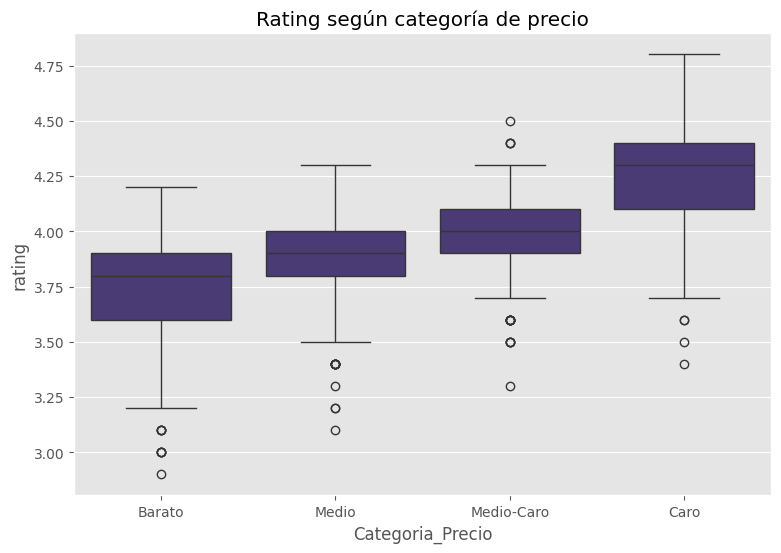

Categoria_Precio
Barato         3.753828
Caro           4.265191
Desconocido    3.988235
Medio          3.896600
Medio-Caro     4.021277
Name: rating, dtype: float64

In [16]:
sns.boxplot(data=wines, x='Categoria_Precio', y='rating', order=categorias_precio)
plt.title("Rating según categoría de precio")
plt.show()

wines.groupby('Categoria_Precio')['rating'].mean()


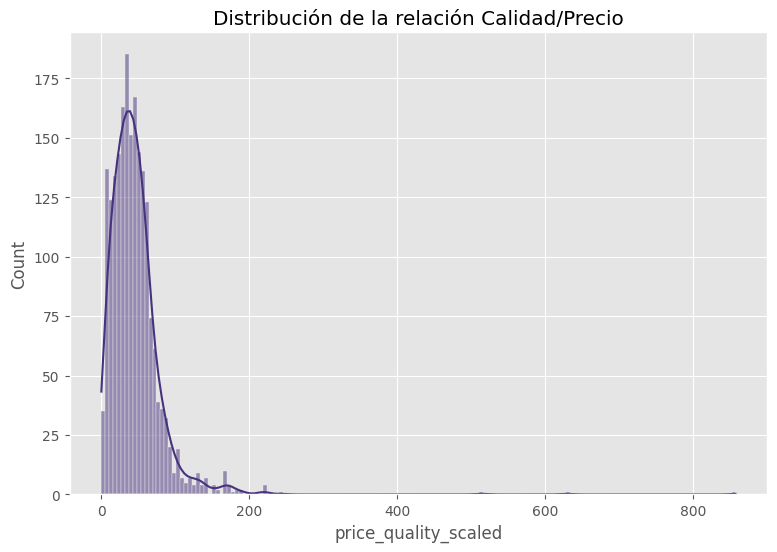

In [17]:
scaler = MinMaxScaler()

wines[["rating_scaled", "price_scaled"]] = scaler.fit_transform(wines[["rating", "price"]])

wines['price_quality_scaled'] = wines['rating_scaled'] / wines['price_scaled']
wines[['rating', 'price', 'price_quality_scaled']].sort_values(by='price_quality_scaled', ascending=False).head(10)
sns.histplot(wines['price_quality_scaled'], kde=True)
plt.title("Distribución de la relación Calidad/Precio")
plt.show()


In [18]:
wines_filtrados = wines[wines['price'] > 0].copy()
#wines_filtrados['price_quality_scaled'] = wines_filtrados['rating_scaled'] / wines_filtrados['price_scaled']
top_vinos_cp = wines_filtrados.sort_values(by='price_quality_scaled', ascending=False).head(10)
top_vinos_cp[['name', 'price', 'rating', 'rating_scaled', 'price_scaled', 'price_quality_scaled']]


,name,price,rating,rating_scaled,price_scaled,price_quality_scaled
993,Rosé,6.55,3.6,0.368421,0.000000,inf
1088,Astica Torrontés,6.99,3.4,0.263158,0.000307,856.722488
1621,Cavas Don Nicasio Chardonnay,7.99,4.1,0.631579,0.001005,628.263158
1127,Malbec,6.99,3.2,0.157895,0.000307,514.033493
1819,Red Blend,9.95,4.0,0.578947,0.002374,243.913932
521,Barrel Select Malbec,9.99,3.9,0.526316,0.002401,219.161567
1839,La Flor Malbec,9.99,3.9,0.526316,0.002401,219.161567
1933,Alta Pinot Grigio,9.99,3.9,0.526316,0.002401,219.161567
1942,Cabernet Sauvignon,9.99,3.9,0.526316,0.002401,219.161567
1122,Cabernet Sauvignon,8.13,3.3,0.210526,0.001103,190.864757


In [19]:
wines_filtrados['log_price'] = np.log1p(wines_filtrados['price'])
wines_filtrados['calidad_precio_log'] = wines_filtrados['rating'] / wines_filtrados['log_price']
top_vinos_cp_log = wines_filtrados.sort_values(by='calidad_precio_log', ascending=False).head(20)
top_vinos_cp_log[['name', 'price', 'rating', 'log_price', 'calidad_precio_log']]


,name,price,rating,log_price,calidad_precio_log
1621,Cavas Don Nicasio Chardonnay,7.99,4.1,2.196113,1.866935
993,Rosé,6.55,3.6,2.021548,1.780814
1819,Red Blend,9.95,4.0,2.393339,1.671305
1469,Terroir Expressions Hostage Single Vineyard Al...,11.99,4.2,2.564180,1.637951
1088,Astica Torrontés,6.99,3.4,2.078191,1.636038
521,Barrel Select Malbec,9.99,3.9,2.396986,1.627043
1839,La Flor Malbec,9.99,3.9,2.396986,1.627043
1933,Alta Pinot Grigio,9.99,3.9,2.396986,1.627043
1942,Cabernet Sauvignon,9.99,3.9,2.396986,1.627043
1625,High Altitude Torrontes,11.99,4.1,2.564180,1.598952


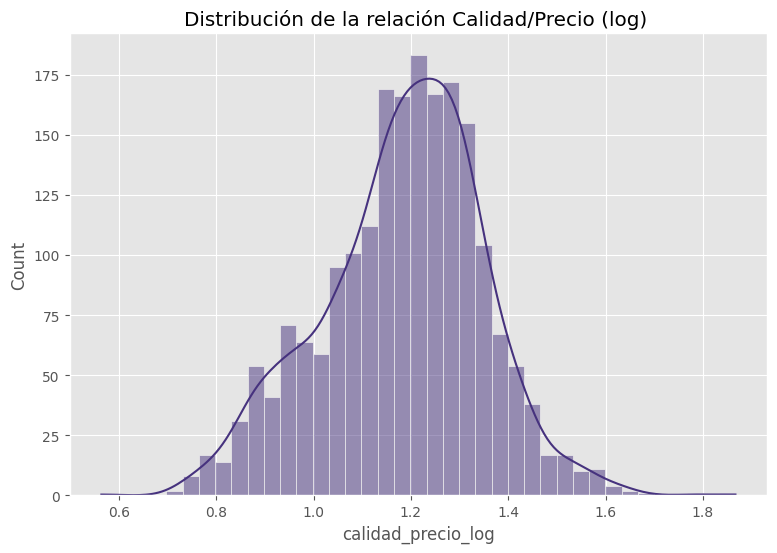

In [20]:
sns.histplot(wines_filtrados['calidad_precio_log'], kde=True)
plt.title("Distribución de la relación Calidad/Precio (log) ")
plt.show()

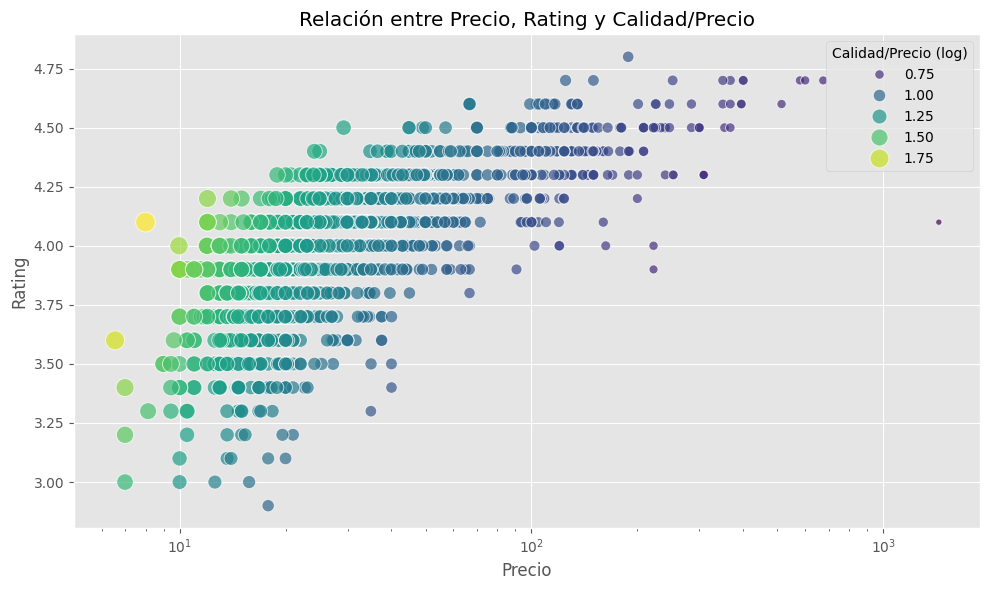

In [21]:
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(
    data=wines_filtrados,
    x="price",
    y="rating",
    hue="calidad_precio_log",
    palette="viridis",
    size="calidad_precio_log",
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Relación entre Precio, Rating y Calidad/Precio")
plt.xlabel("Precio")
plt.ylabel("Rating")
plt.legend(title="Calidad/Precio (log)")
plt.xscale("log")  
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_43805/36936868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="calidad_precio_log", y="name", palette="viridis")


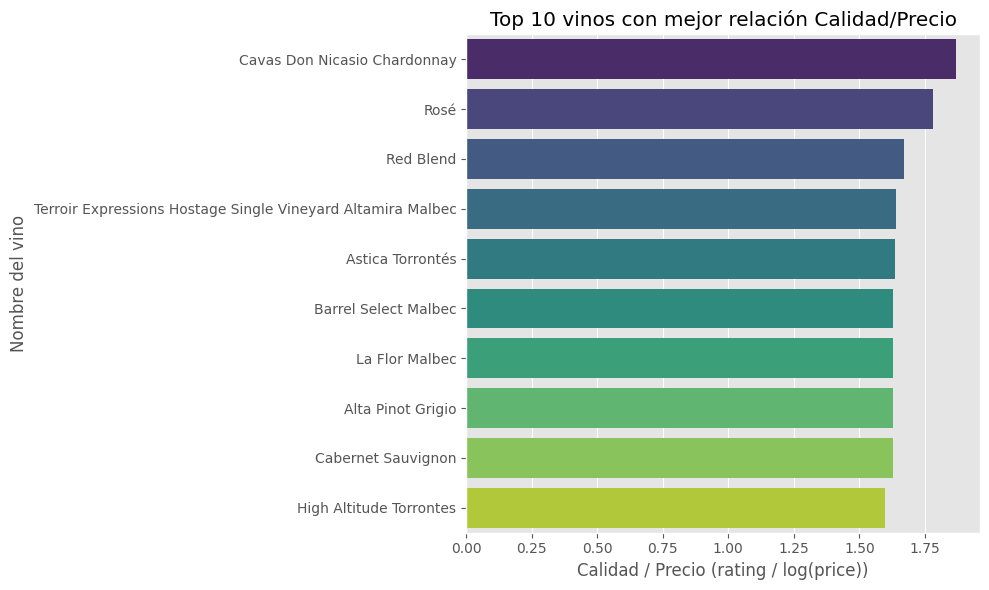

In [22]:
top10 = top_vinos_cp_log.head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10, x="calidad_precio_log", y="name", palette="viridis")
plt.title("Top 10 vinos con mejor relación Calidad/Precio")
plt.xlabel("Calidad / Precio (rating / log(price))")
plt.ylabel("Nombre del vino")
plt.tight_layout()
plt.show()


/home/maricel/WineRecommendation-2/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/home/maricel/WineRecommendation-2/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/home/maricel/WineRecommendation-2/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/home/maricel/WineRecommendation-2/.venv/lib/python3.12/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


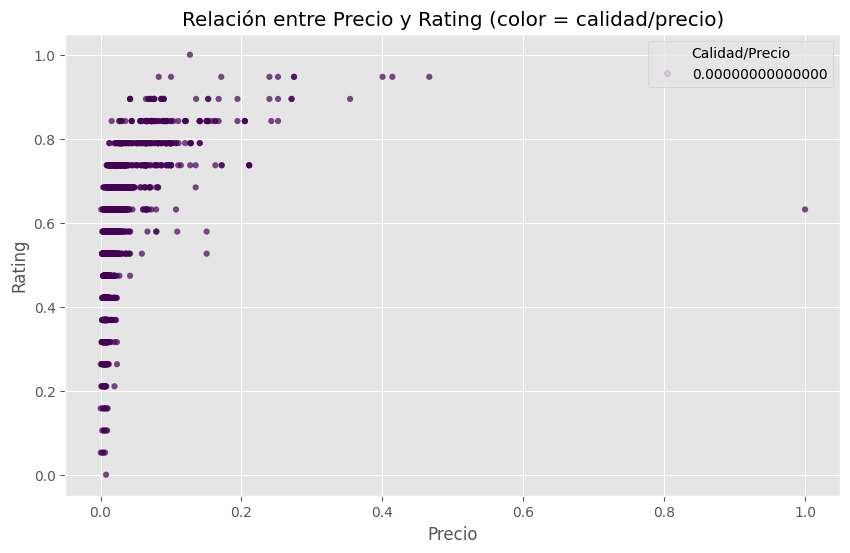

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wines, x='price_scaled', y='rating_scaled', hue='price_quality_scaled',
                palette='viridis', size='price_quality_scaled', sizes=(20, 200), alpha=0.7)

plt.title('Relación entre Precio y Rating (color = calidad/precio)')
plt.xlabel('Precio')
plt.ylabel('Rating')
plt.legend(title='Calidad/Precio')
plt.grid(True)
plt.show()


# 03 | Relaciones entre variables

## Relaciones entre caracteristicas de los vinos y maridajes

- Relaciones entre perfiles de sabor y maridajes
- Notas de sabor más frecuentes y su relación con maridajes
- Patrones entre tipos de uva  más comunes y maridajes

<br>
<br>
---


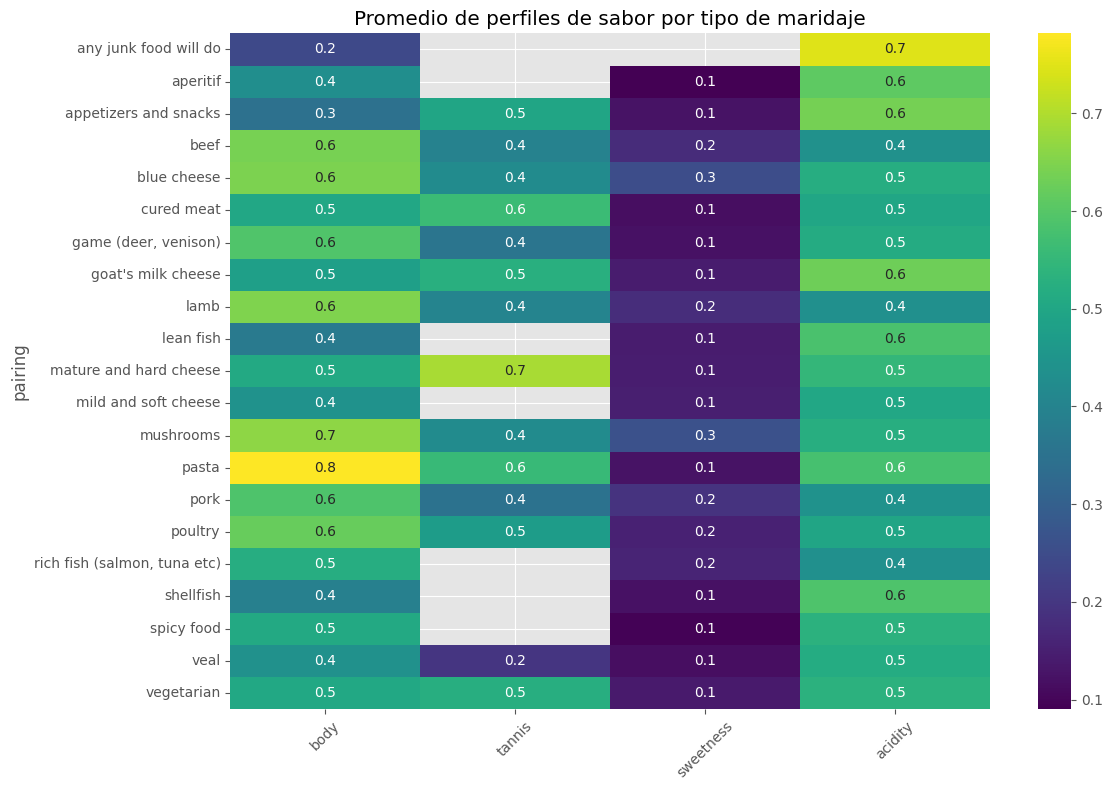

In [24]:
taste_cols = ['body', 'tannis', 'sweetness', 'acidity']

pairing_cols = [
    'any junk food will do', 'aperitif', 'appetizers and snacks', 'beef', 'blue cheese',
    'cured meat', 'game (deer, venison)', "goat's milk cheese", 'lamb', 'lean fish',
    'mature and hard cheese', 'mild and soft cheese', 'mushrooms', 'pasta', 'pork',
    'poultry', 'rich fish (salmon, tuna etc)', 'shellfish', 'spicy food', 'veal', 'vegetarian'
]
melted = wines.melt(id_vars=taste_cols, 
                    value_vars=pairing_cols,
                    var_name='pairing',
                    value_name='is_present')

melted = melted[melted['is_present'] == 1]

taste_by_pairing = melted.groupby('pairing')[taste_cols].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(taste_by_pairing, annot=True, cmap="viridis", fmt=".1f")
plt.title("Promedio de perfiles de sabor por tipo de maridaje")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



/tmp/ipykernel_43805/1563244771.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=note_means.values, y=note_means.index, palette="viridis")


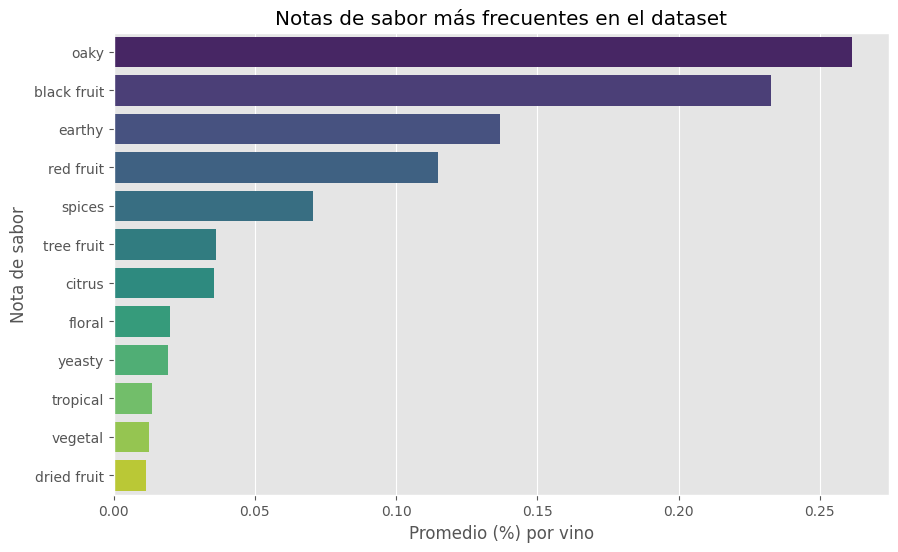

In [25]:
notes_cols = [
    'black fruit', 'citrus', 'dried fruit', 'earthy', 'floral', 'oaky',
    'red fruit', 'spices', 'tree fruit', 'tropical', 'vegetal', 'yeasty'
]
note_means = wines[notes_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=note_means.values, y=note_means.index, palette="viridis")
plt.title("Notas de sabor más frecuentes en el dataset")
plt.xlabel("Promedio (%) por vino")
plt.ylabel("Nota de sabor")
plt.show()



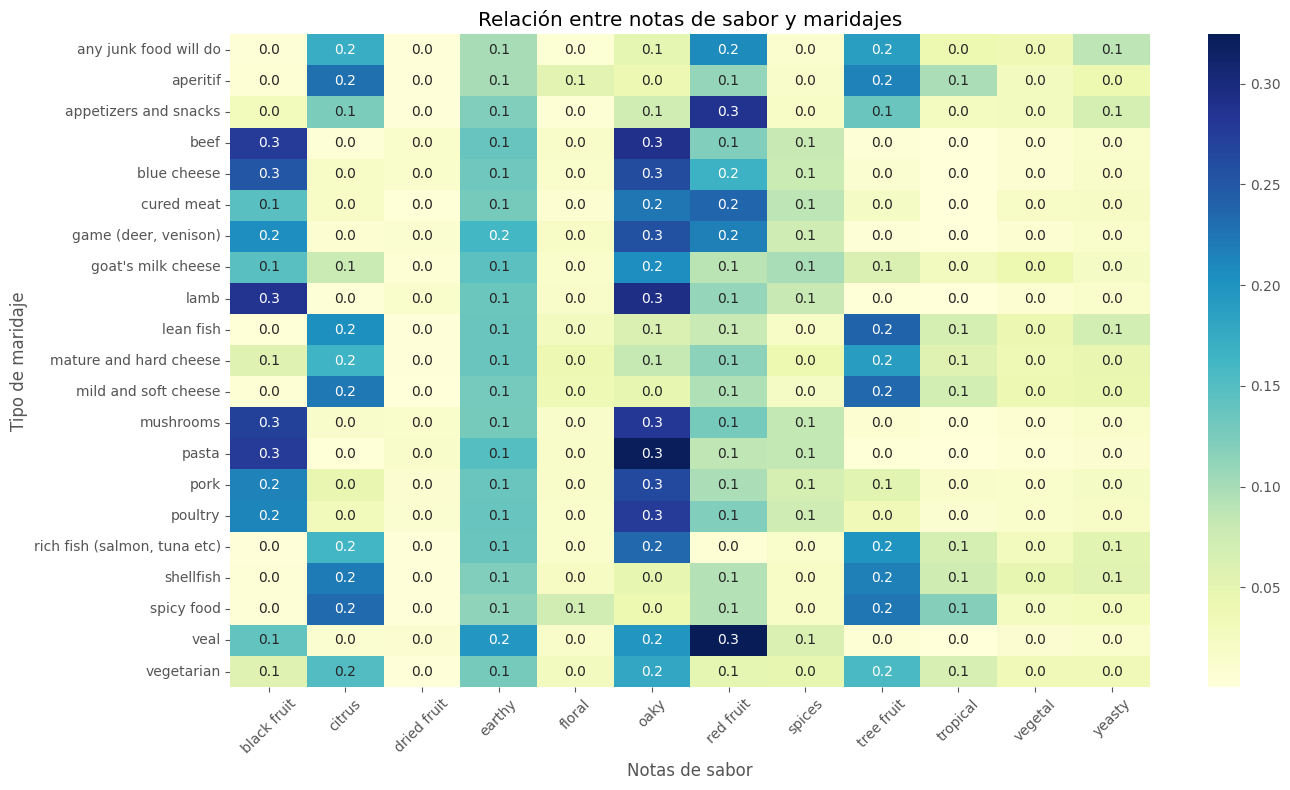

In [26]:
melted_notes = wines.melt(id_vars=notes_cols, 
                          value_vars=pairing_cols,
                          var_name='pairing',
                          value_name='is_present')


melted_notes = melted_notes[melted_notes['is_present'] == 1]
notes_by_pairing = melted_notes.groupby('pairing')[notes_cols].mean()

plt.figure(figsize=(14, 8))
sns.heatmap(notes_by_pairing, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Relación entre notas de sabor y maridajes")
plt.xlabel("Notas de sabor")
plt.ylabel("Tipo de maridaje")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


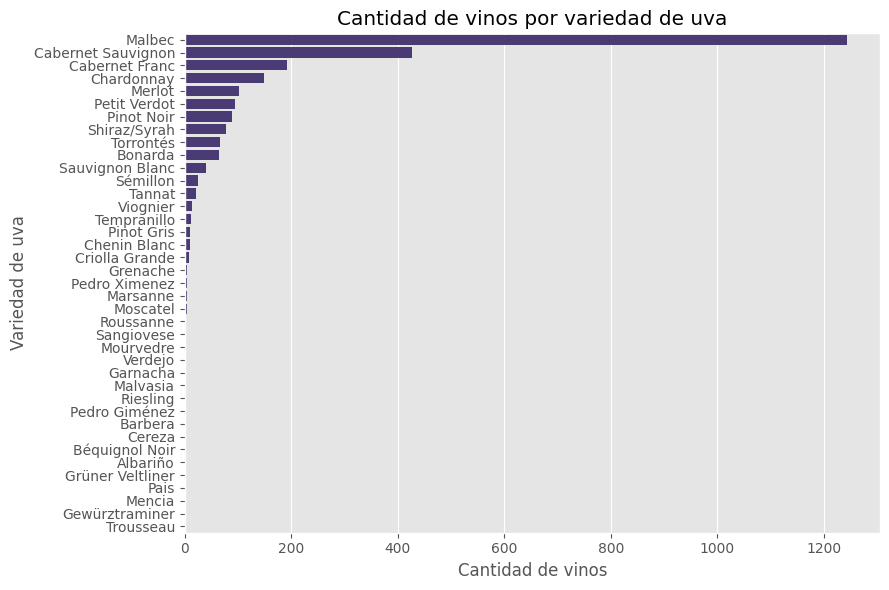

In [27]:
grape_cols = [
    'Albariño', 'Barbera', 'Bonarda', 'Béquignol Noir', 'Cabernet Franc', 'Cabernet Sauvignon',
    'Cereza', 'Chardonnay', 'Chenin Blanc', 'Criolla Grande', 'Garnacha', 'Gewürztraminer',
    'Grenache', 'Grüner Veltliner', 'Malbec', 'Malvasia', 'Marsanne', 'Mencia', 'Merlot',
    'Moscatel', 'Mourvedre', 'Pais', 'Pedro Giménez', 'Pedro Ximenez', 'Petit Verdot',
    'Pinot Gris', 'Pinot Noir', 'Riesling', 'Roussanne', 'Sangiovese', 'Sauvignon Blanc',
    'Shiraz/Syrah', 'Sémillon', 'Tannat', 'Tempranillo', 'Torrontés', 'Trousseau',
    'Verdejo', 'Viognier'
]
grape_counts = wines[grape_cols].sum().sort_values(ascending=False)
sns.barplot(x=grape_counts.values, y=grape_counts.index)
plt.title("Cantidad de vinos por variedad de uva")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Variedad de uva")
plt.tight_layout()
plt.show()


In [28]:
grape_counts_df = wines[grape_cols].sum().sort_values(ascending=False).reset_index()
grape_counts_df.columns = ['Variedad de uva', 'Cantidad de vinos']
from IPython.display import display

display(grape_counts_df)


,Variedad de uva,Cantidad de vinos
0,Malbec,1243.0
1,Cabernet Sauvignon,427.0
2,Cabernet Franc,191.0
3,Chardonnay,149.0
4,Merlot,101.0
5,Petit Verdot,95.0
6,Pinot Noir,89.0
7,Shiraz/Syrah,77.0
8,Torrontés,66.0
9,Bonarda,65.0


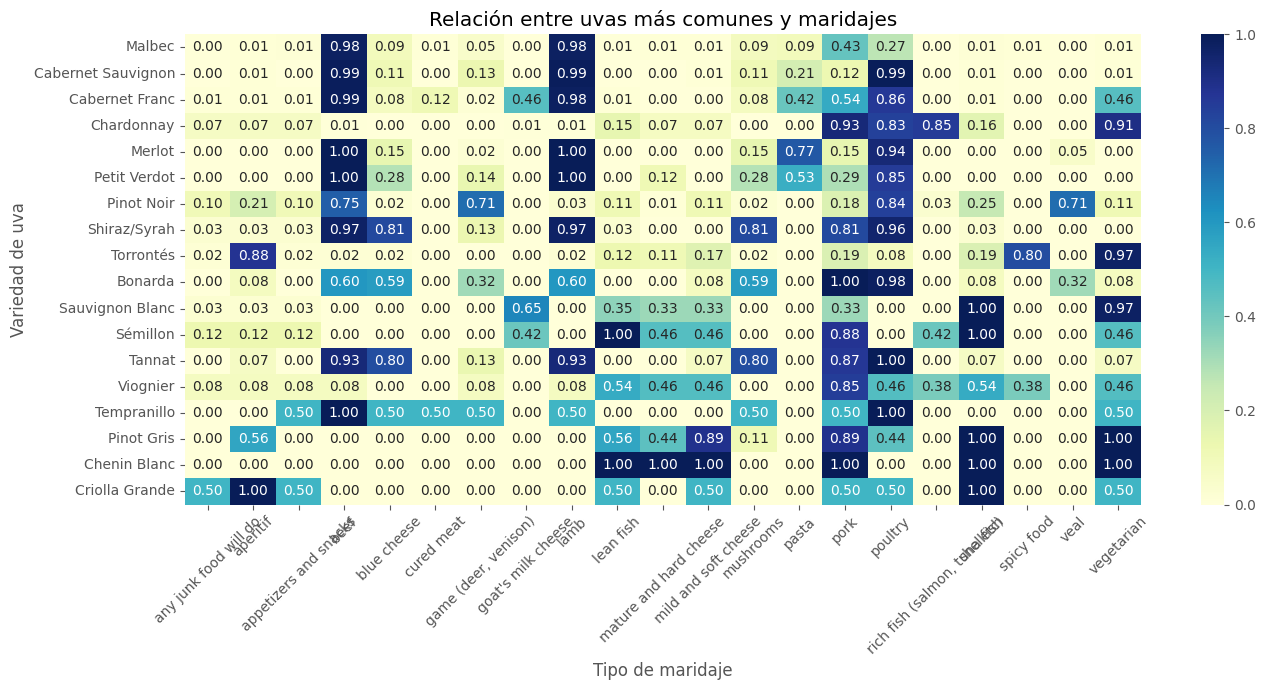

In [29]:
pairing_cols = [
    'any junk food will do', 'aperitif', 'appetizers and snacks', 'beef', 'blue cheese',
    'cured meat', 'game (deer, venison)', "goat's milk cheese", 'lamb', 'lean fish',
    'mature and hard cheese', 'mild and soft cheese', 'mushrooms', 'pasta', 'pork',
    'poultry', 'rich fish (salmon, tuna etc)', 'shellfish', 'spicy food', 'veal', 'vegetarian'
]
grapes_melted = wines.melt(id_vars=pairing_cols,
                           value_vars=grape_cols,
                           var_name='grape',
                           value_name='is_grape')


grapes_melted = grapes_melted[grapes_melted['is_grape'] == 1]
grape_pairing_freq = grapes_melted.groupby('grape')[pairing_cols].mean()
top_grapes = wines[grape_cols].sum().sort_values(ascending=False).head(18).index.tolist()
heatmap_data = grape_pairing_freq.loc[top_grapes]

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Relación entre uvas más comunes y maridajes")
plt.xlabel("Tipo de maridaje")
plt.ylabel("Variedad de uva")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


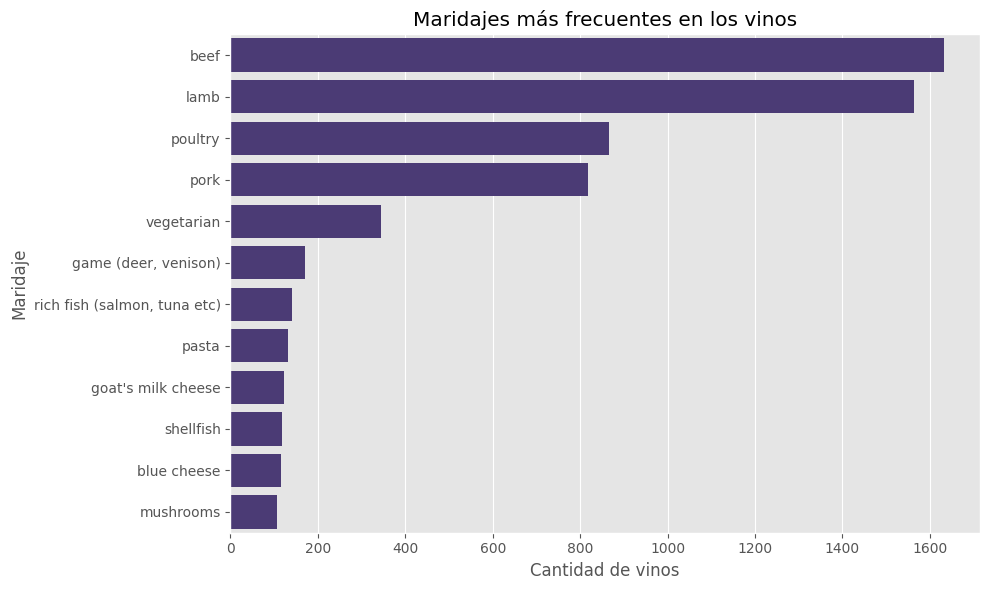

In [41]:
pairing_freq = wines_filtrados[pairing_cols].sum().sort_values(ascending=False)

top_pairing = pairing_freq.head(12)

sns.barplot(x=top_pairing.values, y=top_pairing.index)
plt.title("Maridajes más frecuentes en los vinos")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Maridaje")
plt.tight_layout()
plt.show()


# 02 | Análisis de variables categóricas

In [42]:
wines_filtrados.select_dtypes(include=['object']).columns


Index(['wine_link', 'name', 'winery', 'style', 'image', 'Categoria_Precio'], dtype='object')

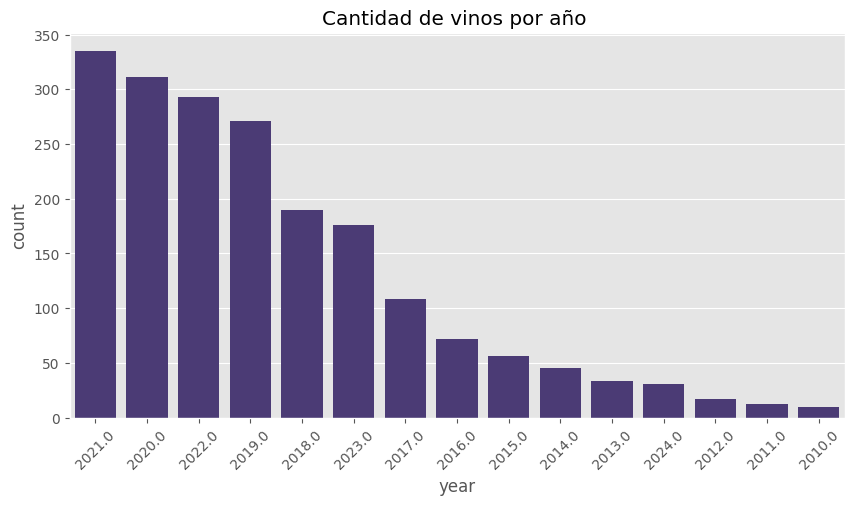

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(data=wines_filtrados, x='year', order=wines_filtrados['year'].value_counts().index[:15])
plt.title("Cantidad de vinos por año ")
plt.xticks(rotation=45)
plt.show()


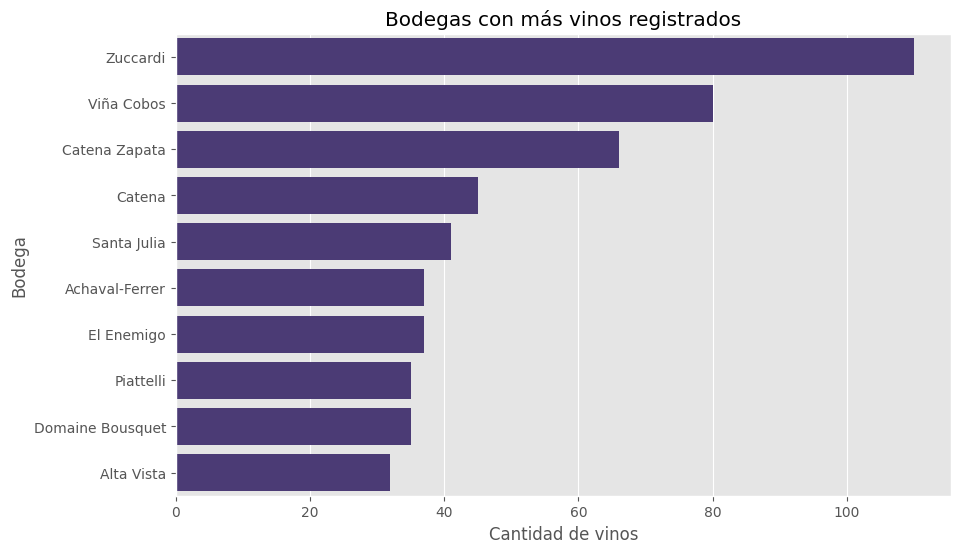

In [44]:
top_bodegas = wines_filtrados['winery'].value_counts().head(10)

sns.barplot(x=top_bodegas.values, y=top_bodegas.index)
plt.title("Bodegas con más vinos registrados")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Bodega")
plt.show()


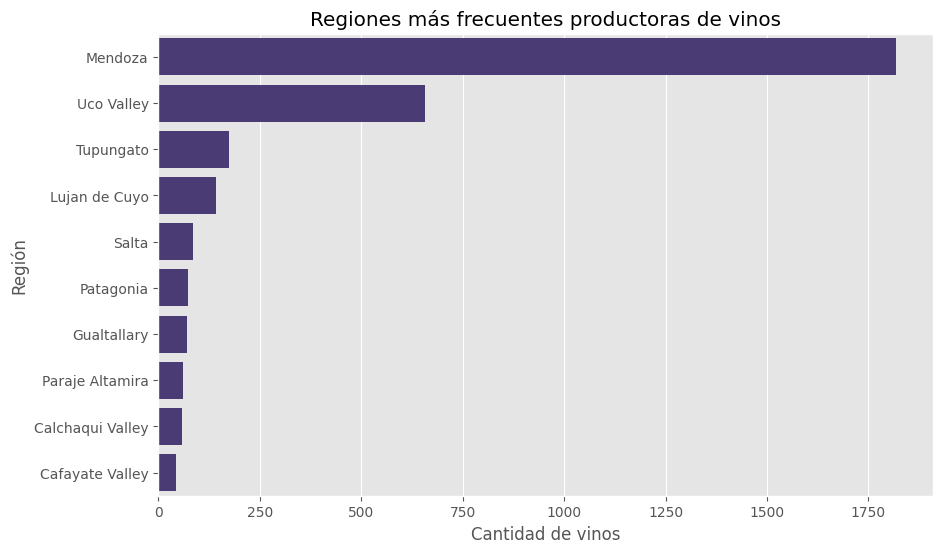

In [61]:
region_cols = [
    'Cafayate Valley', 'Calchaqui Valley', 'Campanha',
    'Famatina', 'Gualtallary', 'La Consulta', 'La Rioja', 'Las Compuertas',
    'Lujan de Cuyo', 'Lunlunta', 'Maipu', 'Mendoza', 'Paraje Altamira',
    'Patagonia', 'Pedernal Valley', 'Perdriel', 'Rio Grande do Sul', 'Rio Negro',
    'Salta', 'San Carlos', 'San Juan', 'San Rafael', 'Serra Gaúcha',
    'Tulum Valley', 'Tunuyán', 'Tupungato', 'Uco Valley', 'Vale dos Vinhedos',
    'Vista Flores'
]

regiones_melted = wines.melt(
    value_vars=region_cols,
    var_name='region',
    value_name='is_region'
)

regiones_validas = regiones_melted[regiones_melted['is_region'] == 1]
conteo_regiones = regiones_validas['region'].value_counts().head(10)

sns.barplot(x=conteo_regiones.values, y=conteo_regiones.index)
plt.title("Regiones más frecuentes productoras de vinos")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Región")
plt.show()



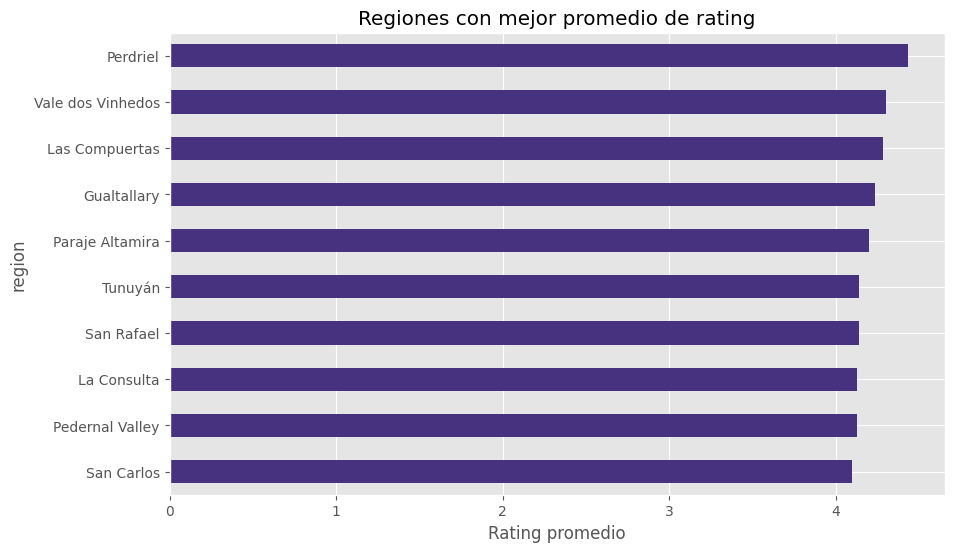

In [ ]:
wines_filtrados_reset = wines_filtrados.reset_index().copy()

regiones_melted = wines_filtrados_reset.melt(
    id_vars=['index', 'rating'], 
    value_vars=region_cols,
    var_name='region',
    value_name='is_region'
)

regiones_validas = regiones_melted[regiones_melted['is_region'] == 1]
region_rating = regiones_validas.groupby('region')['rating'].mean().sort_values(ascending=False).head(10)

region_rating.plot(kind='barh')
plt.title("Regiones con mejor promedio de rating")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()
plt.show()

region_rating.plot(kind='barh', color='purple')
plt.title("Regiones con mejor promedio de rating")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()
plt.show()




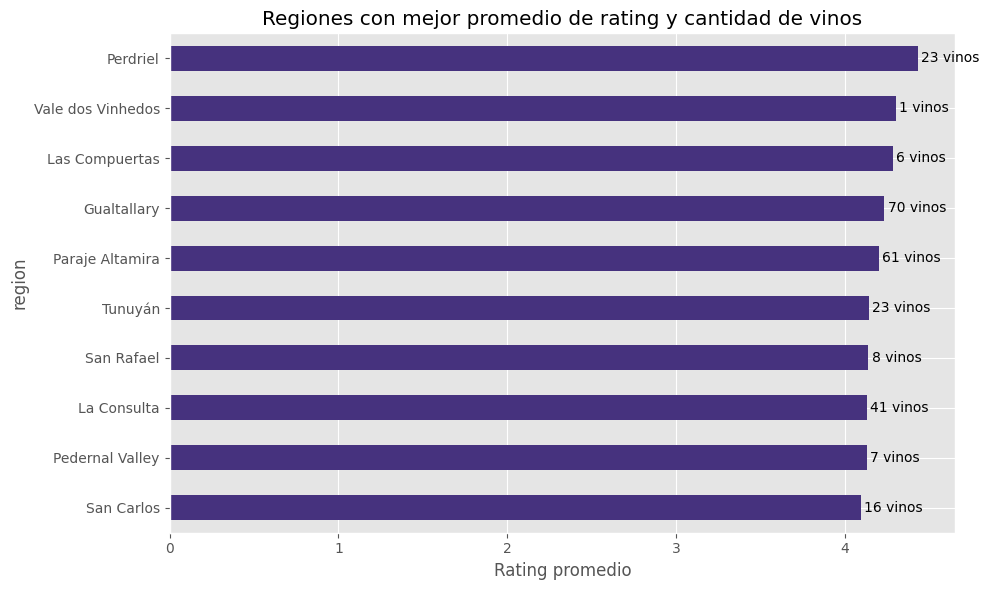

In [71]:
region_rating = regiones_validas.groupby('region')['rating'].mean()

region_counts = regiones_validas['region'].value_counts()

region_stats = pd.DataFrame({
    'rating_promedio': region_rating,
    'cantidad_vinos': region_counts
}).dropna().sort_values(by='rating_promedio', ascending=False).head(10)

ax = region_stats['rating_promedio'].plot(kind='barh',)
plt.title("Regiones con mejor promedio de rating y cantidad de vinos")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()

for i, (rating, cantidad) in enumerate(zip(region_stats['rating_promedio'], region_stats['cantidad_vinos'])):
    plt.text(rating + 0.02, i, f"{int(cantidad)} vinos", va='center')

plt.tight_layout()
plt.show()


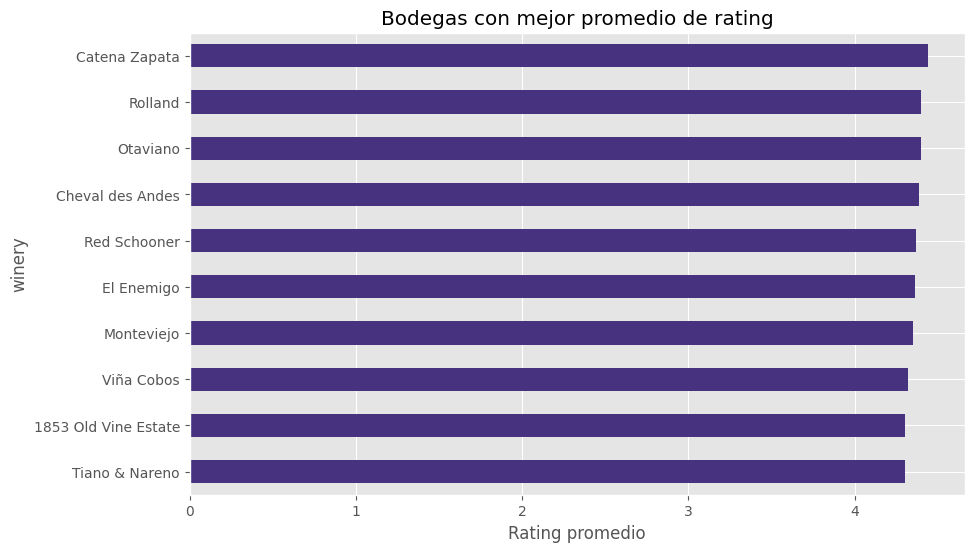

In [48]:
bodega_rating = wines_filtrados.groupby('winery')['rating'].mean().sort_values(ascending=False).head(10)
bodega_rating.plot(kind='barh')
plt.title("Bodegas con mejor promedio de rating")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()
plt.show()


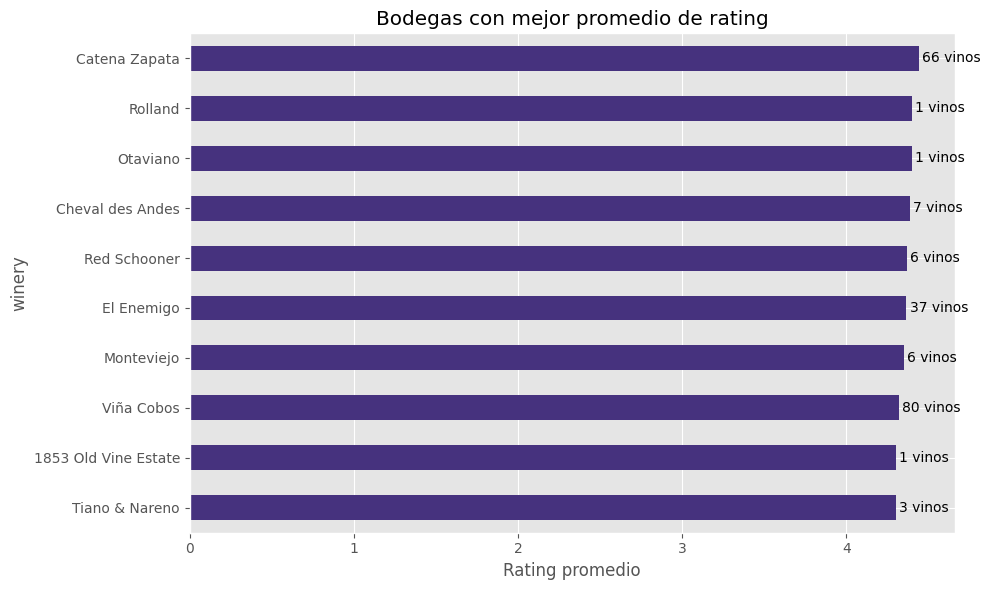

In [ ]:
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (10,6)

bodega_rating = wines_filtrados.groupby('winery')['rating'].mean()
bodega_top10 = bodega_rating.sort_values(ascending=False).head(10)

bodega_counts = wines_filtrados['winery'].value_counts()
bodega_counts_top10 = bodega_counts[bodega_top10.index]


ax = bodega_top10.plot(kind='barh')
plt.title("Bodegas con mejor promedio de rating")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()


for i, (rating, cantidad) in enumerate(zip(bodega_top10, bodega_counts_top10)):
    plt.text(rating + 0.02, i, f"{int(cantidad)} vinos", va='center')

plt.tight_layout()
plt.show()


In [66]:
top_vinos = wines_filtrados.sort_values(by='rating', ascending=False).head(50)
top_vinos[['name', 'rating', 'price', 'winery']].head(10)


,name,rating,price,winery
0,Paraiso,4.8,188.33,Luigi Bosca
1145,Cobos Volturno,4.7,399.99,Viña Cobos
6,Adrianna Vineyard Mundus Bacillus Terrae Malbec,4.7,367.49,Catena Zapata
7,Cobos Viña Cobos Malbec,4.7,599.99,Viña Cobos
9,Cobos Volturno,4.7,349.99,Viña Cobos
5,La Violeta,4.7,125.00,Monteviejo
1,Estiba Reservada,4.7,675.00,Catena Zapata
3,La Violeta,4.7,150.00,Monteviejo
4,Cobos Volturno,4.7,399.99,Viña Cobos
8,Cobos Volturno,4.7,251.99,Viña Cobos


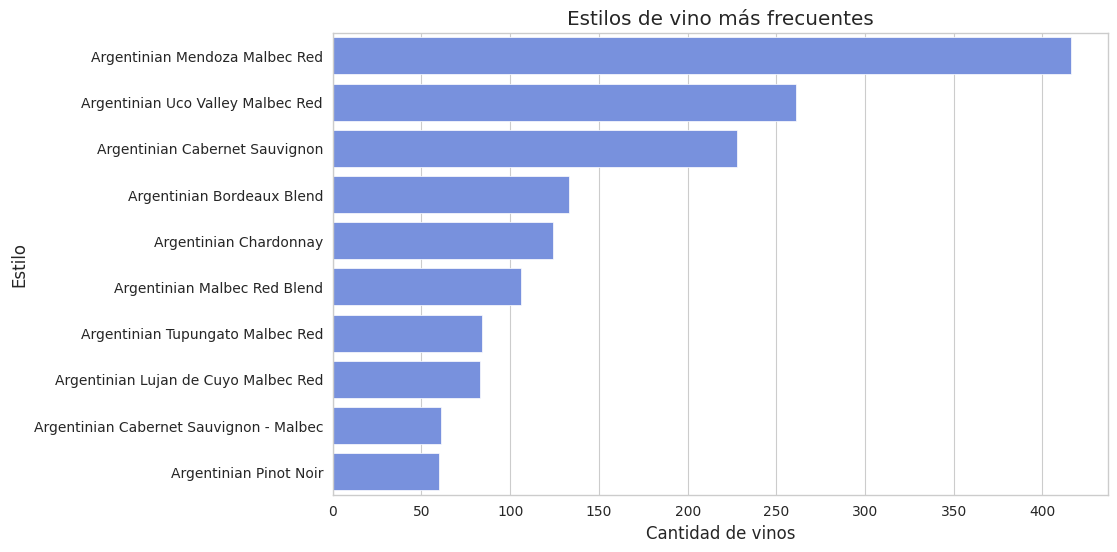

In [76]:
style_counts = wines['style'].value_counts().head(10)

sns.set_style("whitegrid")
sns.set_palette("coolwarm")

plt.figure(figsize=(10, 6))
sns.barplot(x=style_counts.values, y=style_counts.index)
plt.title("Estilos de vino más frecuentes")
plt.xlabel("Cantidad de vinos")
plt.ylabel("Estilo")
plt.show()


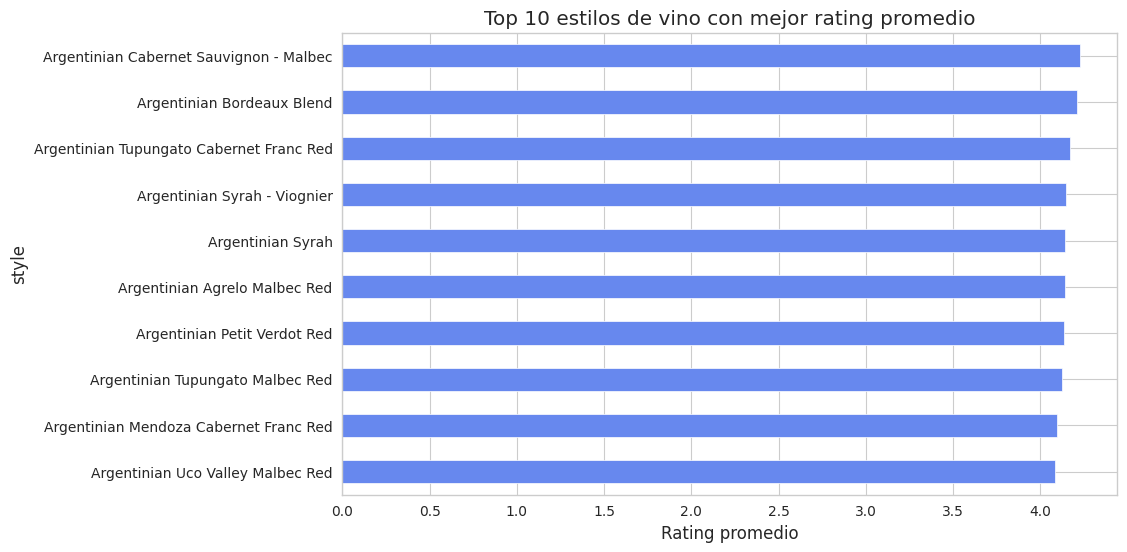

In [ ]:
wines_filtrados_style = wines.dropna(subset=['style', 'rating'])
style_rating = wines_filtrados_style.groupby('style')['rating'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
style_rating.plot(kind='barh')
plt.title("Estilos de vino con mejor rating promedio")
plt.xlabel("Rating promedio")
plt.gca().invert_yaxis()
plt.show()


# 04 | Reducción de dimensionalidad y selección de características

*(Análisis Exploratorio de Datos con técnicas avanzadas)*

#### Me quedaron ideas en la cabeza por hacer a continuación de esto....
###### por ejemplo: Comparativa de estilo vs región o país, Distribución por alcohol, categorizarlos por rango, y un par más

### Agrupar vinos similares basados en perfiles de sabor

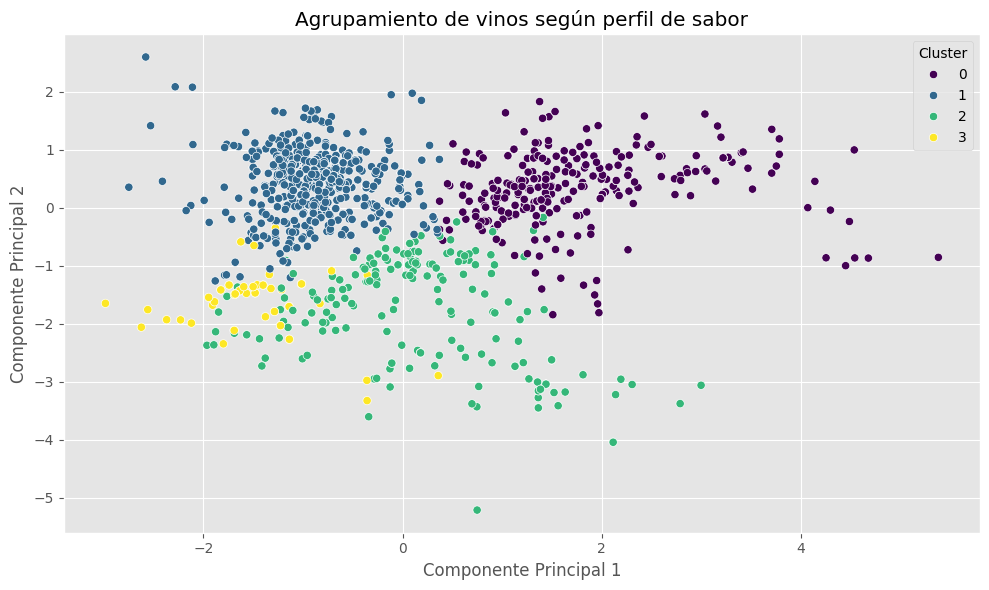

In [30]:
perfil_sabor_cols = ['body', 'tannis', 'sweetness', 'acidity']

df_sabor = wines_filtrados.dropna(subset=perfil_sabor_cols).copy()

scaler = StandardScaler()
sabor_normalizado = scaler.fit_transform(df_sabor[perfil_sabor_cols])

kmeans = KMeans(n_clusters=4, random_state=42)
df_sabor['cluster'] = kmeans.fit_predict(sabor_normalizado)

pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(sabor_normalizado)

df_sabor['PCA1'] = pca_resultado[:, 0]
df_sabor['PCA2'] = pca_resultado[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sabor, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title("Agrupamiento de vinos según perfil de sabor")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()



In [31]:
df_sabor[['name', 'body', 'tannis', 'sweetness', 'acidity', 'cluster']].groupby('cluster').head(5)


,name,body,tannis,sweetness,acidity,cluster
0,Paraiso,0.7343,0.5090,0.1361,0.4474,0
1,Estiba Reservada,0.7417,0.5583,0.1434,0.5445,0
2,Estiba Reservada,0.7417,0.5583,0.1434,0.5445,0
3,La Violeta,0.7306,0.4091,0.2148,0.3661,1
4,Cobos Volturno,0.7105,0.4563,0.2426,0.3844,1
5,La Violeta,0.7306,0.4091,0.2148,0.3661,1
6,Adrianna Vineyard Mundus Bacillus Terrae Malbec,0.6652,0.3627,0.2189,0.4354,1
7,Cobos Viña Cobos Malbec,0.7025,0.3888,0.2260,0.4525,1
10,Nicolás Catena Zapata,0.7443,0.4805,0.1331,0.4404,0
13,Gran Enemigo Single Vineyard Chacayes Cabernet...,0.8187,0.5464,0.1364,0.6196,0


In [32]:
maridaje_cols_presentes = [col for col in pairing_cols if col in df_sabor.columns]

maridajes_por_cluster = df_sabor.groupby('cluster')[maridaje_cols_presentes].sum()
for c in maridajes_por_cluster.index:
    print(f"\nCluster {c} - Maridajes más comunes:")
    top_maridajes = maridajes_por_cluster.loc[c].sort_values(ascending=False).head(5)
    print(top_maridajes)


Cluster 0 - Maridajes más comunes:
beef                    463.0
lamb                    456.0
poultry                 424.0
pasta                   127.0
game (deer, venison)     80.0
Name: 0, dtype: float64

Cluster 1 - Maridajes más comunes:
beef           878.0
lamb           878.0
pork           404.0
poultry         53.0
blue cheese     10.0
Name: 1, dtype: float64

Cluster 2 - Maridajes más comunes:
beef           232.0
lamb           229.0
poultry        187.0
pork           174.0
blue cheese     71.0
Name: 2, dtype: float64

Cluster 3 - Maridajes más comunes:
game (deer, venison)    62.0
poultry                 62.0
veal                    62.0
beef                    60.0
pork                     3.0
Name: 3, dtype: float64


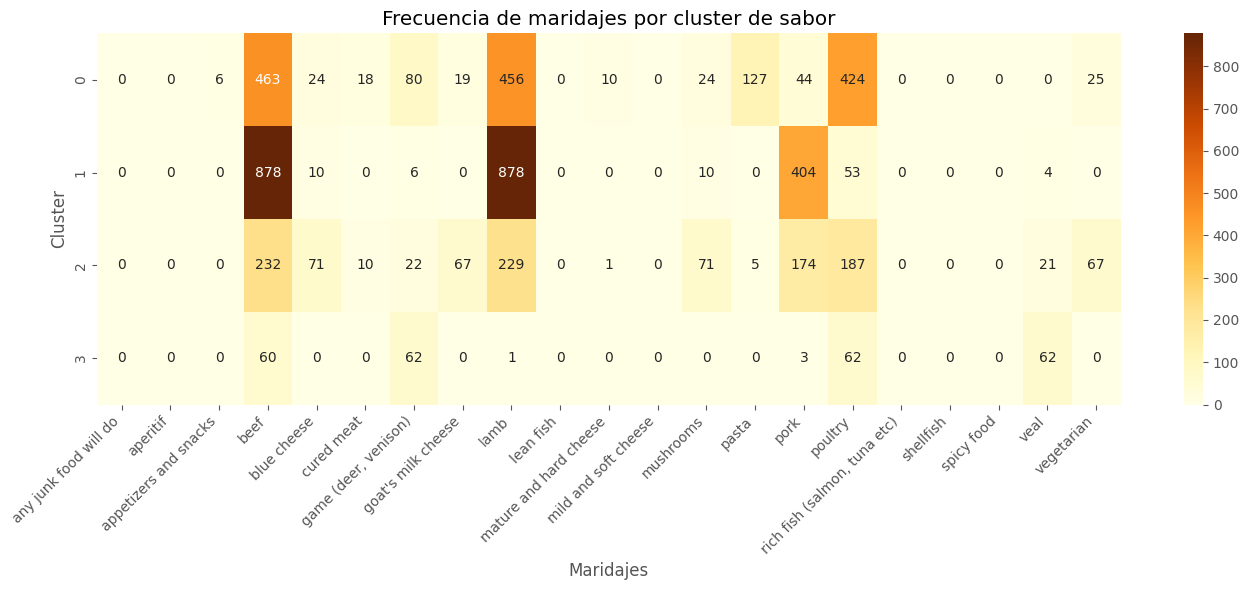

In [33]:
plt.figure(figsize=(14, 6))
sns.heatmap(maridajes_por_cluster, annot=True, cmap="YlOrBr", fmt=".0f")
plt.title("Frecuencia de maridajes por cluster de sabor")
plt.xlabel("Maridajes")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
uvas_presentes = [col for col in grape_cols if col in df_sabor.columns]
uvas_por_cluster = df_sabor.groupby('cluster')[uvas_presentes].sum()
for c in uvas_por_cluster.index:
    top_uva = uvas_por_cluster.loc[c].sort_values(ascending=False).head(1)
    print(f"Cluster {c} - Uva más frecuente: {top_uva.index[0]} (Cantidad: {int(top_uva.values[0])})")


Cluster 0 - Uva más frecuente: Cabernet Sauvignon (Cantidad: 338)
Cluster 1 - Uva más frecuente: Malbec (Cantidad: 865)
Cluster 2 - Uva más frecuente: Malbec (Cantidad: 132)
Cluster 3 - Uva más frecuente: Pinot Noir (Cantidad: 59)


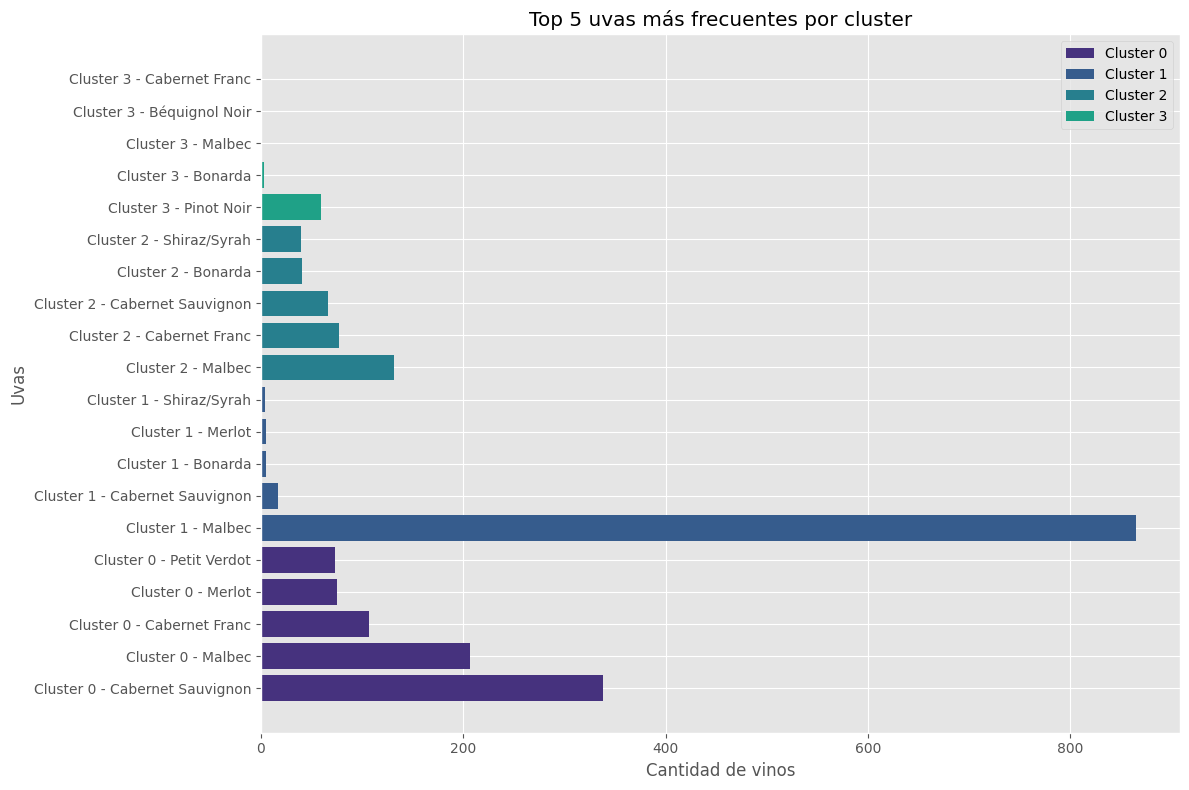

In [35]:
plt.figure(figsize=(12, 8))

for c in uvas_por_cluster.index:
    top_uvas = uvas_por_cluster.loc[c].sort_values(ascending=False).head(5)
    plt.barh(
        [f'Cluster {c} - {uva}' for uva in top_uvas.index],
        top_uvas.values,
        label=f'Cluster {c}'
    )

plt.title('Top 5 uvas más frecuentes por cluster')
plt.xlabel('Cantidad de vinos')
plt.ylabel('Uvas')
plt.legend()
plt.tight_layout()
plt.show()

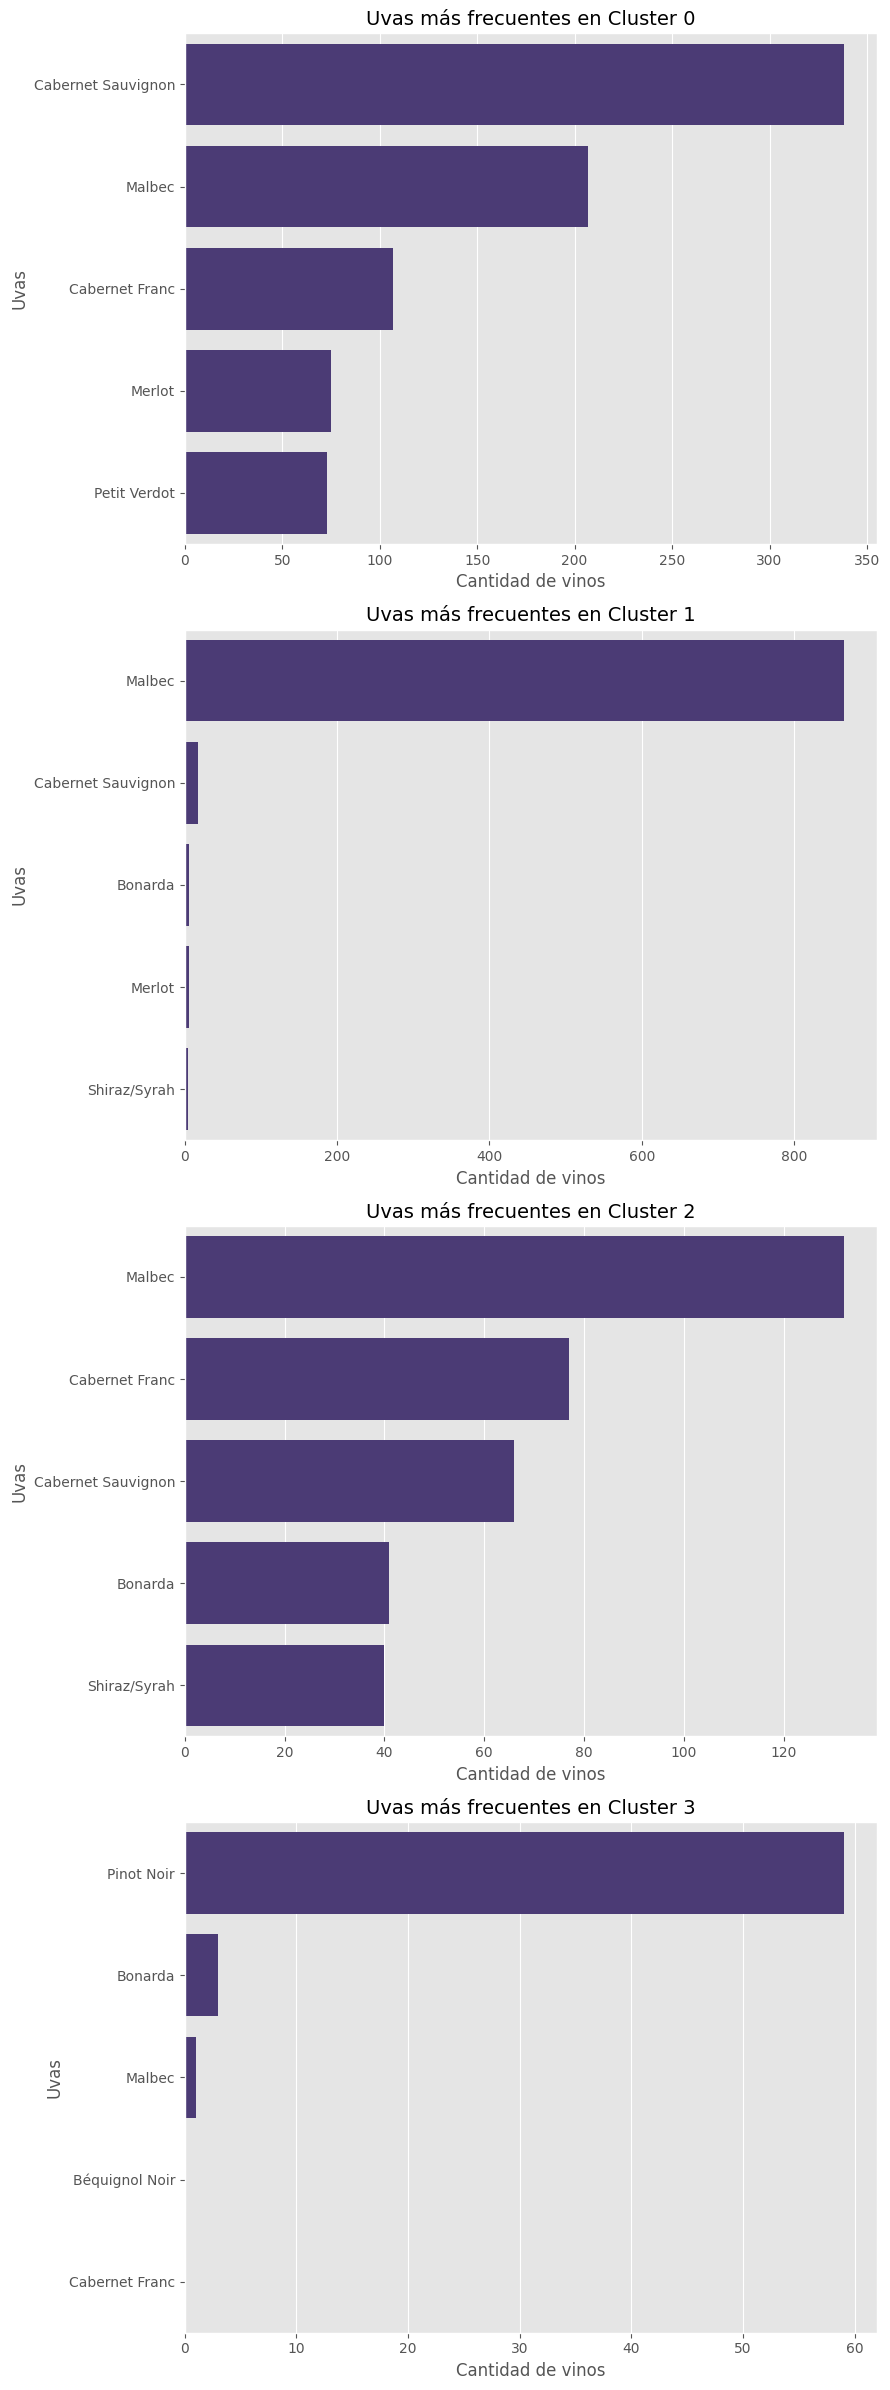

In [36]:


plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9, 6)

n_clusters = df_sabor['cluster'].nunique()

fig, axes = plt.subplots(n_clusters, 1, figsize=(9, 6 * n_clusters))

if n_clusters == 1:
    axes = [axes]

for cluster_id, ax in zip(range(n_clusters), axes):
    vinos_cluster = df_sabor[df_sabor['cluster'] == cluster_id]
    uvas_cluster = vinos_cluster[grape_cols].sum().sort_values(ascending=False).head(5)
    
    sns.barplot(x=uvas_cluster.values, y=uvas_cluster.index, ax=ax)
    ax.set_title(f'Uvas más frecuentes en Cluster {cluster_id}', fontsize=14)
    ax.set_xlabel("Cantidad de vinos")
    ax.set_ylabel("Uvas")

plt.tight_layout()
plt.show()



In [37]:
pairings_por_cluster = df_sabor.groupby('cluster')[pairing_cols].sum()

resumen_clusters = []

for c in uvas_por_cluster.index:
    top_uva = uvas_por_cluster.loc[c].sort_values(ascending=False).idxmax()
    top_maridajes = pairings_por_cluster.loc[c].sort_values(ascending=False).head(3)
    resumen_clusters.append({
        'Cluster': f'Cluster {c}',
        'Uva Dominante': top_uva,
        'Top Maridajes': ', '.join(top_maridajes.index)
    })

df_resumen = pd.DataFrame(resumen_clusters)
print(df_resumen)


     Cluster       Uva Dominante                        Top Maridajes
0  Cluster 0  Cabernet Sauvignon                  beef, lamb, poultry
1  Cluster 1              Malbec                     beef, lamb, pork
2  Cluster 2              Malbec                  beef, lamb, poultry
3  Cluster 3          Pinot Noir  game (deer, venison), poultry, veal
